## Introduction
The audience would be telecom business itself, interested in reducing how much money is lost because of customers who dont stick around very long. The question is are there any predictable patterns here?

The goal of this project is to identify patterns in customer behavior to predict churn in the Welcome Company’s customer base. By understanding key factors influencing churn, the company aims to reduce customer turnover, thereby minimizing revenue loss and improving overall business performance.

## Objectives
1. Predict Customer Churn: develop a model that can accurately predict whether a customer will churn.

2. Understand key factors influencing Churn. 

3. Improve customer retention: predict which customers are at risk of chunning.

## Task: Build a classifier to predict whether a customer will stop doing business with SyriaTel. 



## Data Understanding

The dataset `bigml.csv` contains information about customers in telecomunations company, SyriaTel. The goal of the project is to build a classifier to predict whether a customer will stop doing business with SyriaTel. 


The goal of the project is to build a classification model to predict whether a customer will churn(Leave the company). The target variable is `churn`, which is a binary variable (`True` for churn and `False` for non-churn )


In [11]:
#import Data and load data
import pandas as pd 

df =  pd.read_csv('bigml.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset contains 3333 rows, each with 20 columns and 1 target column:

Target variable: `churn`

Numerical features include:  account length, number vmail messages, total day in munites, total day calls, total day charge, total eve calls, total eve charge, total night minutes, total night calls,toatal night charge, total intl minutes, total intl calls, total intl charge, customer service, calls

Categorical features: state, area code, international plan, voice mail plan

Text feature: phone number

# Data Preprocessing

In [13]:
# drop phone number column (its unnecessary)
# phone number is dropped as it is not useful for the predictive model
data = df.drop(columns=['phone number'])

In [14]:
# import relevant function
from sklearn.preprocessing import LabelEncoder

# convert categorical variables into numbers
# label encoding is applied to convert categorical variables ( state, area code, international plan, voicemail plan) into numerical format.

label_encoders = {}
for column in data.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le



In [15]:
# Split the data into features and Target
X = data.drop(columns=['churn'])
y = data['churn']

In [16]:
# Split the Data into Trading and Testing Sets
# import train test split function
from sklearn.model_selection import train_test_split

# splitting data into 70% training and 30% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [17]:
# Output the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training set shape: (2333, 19)
Testing set shape: (1000, 19)
Training labels shape: (2333,)
Testing labels shape: (1000,)


## Model Building and Evaluation

# 1. Logistic Regression

In [18]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear') 

# fit the model to training data
model_log = logreg.fit(X_train, y_train)

#predict on the test data
y_pred = model_log.predict(X_test)

y_pred_proba = model_log.predict_proba(X_test)[:, 1]

1. Confusion matrix

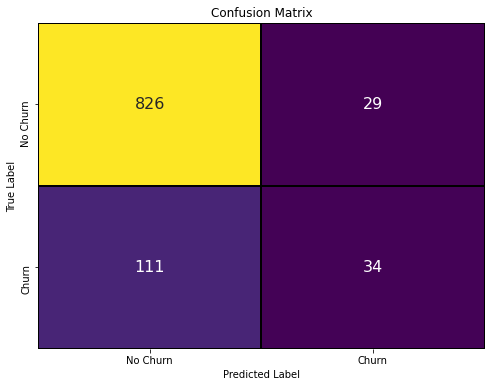

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False, 
            annot_kws={"size": 16}, linewidths=1, linecolor='black',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

2. Classification report

In [20]:
from sklearn.metrics import classification_report

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
print(class_report)

              precision    recall  f1-score   support

    No Churn       0.88      0.97      0.92       855
       Churn       0.54      0.23      0.33       145

    accuracy                           0.86      1000
   macro avg       0.71      0.60      0.62      1000
weighted avg       0.83      0.86      0.84      1000



3. Accuracy

In [21]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8600


4. AUC and ROC

In [22]:
# Import roc-curve, auc
 
from sklearn.metrics import roc_curve, auc

# calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train)

# calculate the fpr, tpr and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# calculate the probability scores of each point in the test set
y_test_score = model_log.decision_function(X_test)

# calculate the fpr tpr,and thresholds for the test set
test_fpr, test_tpr, test_threshols = roc_curve(y_test, y_test_score)

Training AUC: 0.8036615206655694


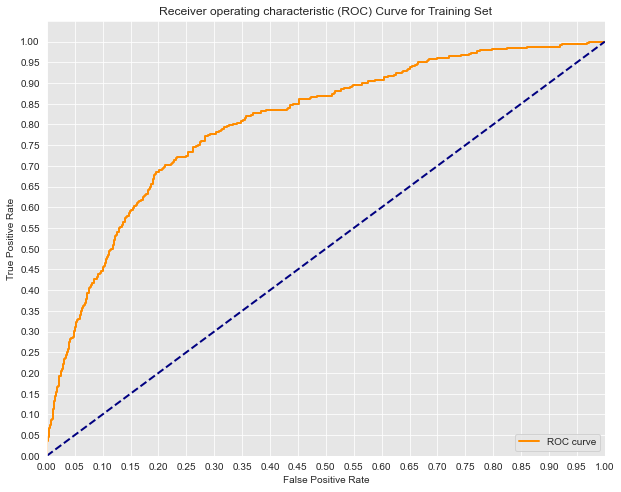

In [23]:
# import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

The score of 0.8037 indicates that the model has the ability to distinguish between churn and non-churn customers during training.  this means there is approximately an 80.37% chance that the model will rank a randomly chosen positive instance(churn) higher than a randomly chosen negative instance(non-churn).


Test AUC: 0.7819157088122606



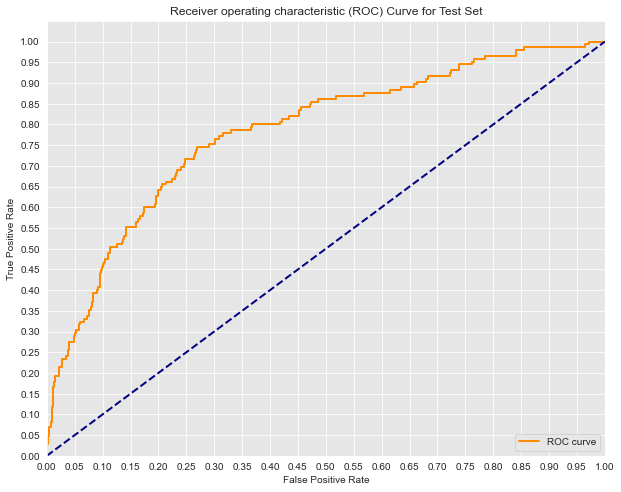

In [24]:
# ROC curve for test set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('')
plt.show()

The score of 0.7819 reflects the models performance on unseen data. it is slightly lower than the training AUC but still indicates good performance.
It means there is approximately 78.19% chance that the model will correctly rank a randomly chosen positive instance higher than a randomly chosen negative instance on the test set.

The AUC score suggests that logistic regression is a fit for the data. it has strong ability to distinguish between customers who churn and those who don't both on the training set and on the unseen test data. There is a slight drop in performance on the test set, it is within an acceptable range, indicating that the model is not overfitting and should perform well when deployed.

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

# Calculate AUC-ROC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc_score:.4f}")

Accuracy: 0.8600
Precision: 0.5397
Recall: 0.2345
F1-score: 0.3269
AUC-ROC: 0.7819


Model interpretation

In [26]:
import numpy as np

# Retrieve feature names and coefficients
feature_names = X_train.columns
coefficients = model_log.coef_[0]

# Create a DataFrame to display the coefficients with the corresponding feature names
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by the absolute value of the coefficients to identify the most influential features
coef_df['abs_coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False).drop(columns=['abs_coefficient'])

coef_df

,Feature,Coefficient
3,international plan,2.194337
4,voice mail plan,-1.181675
18,customer service calls,0.503461
16,total intl calls,-0.167028
15,total intl minutes,0.040706
17,total intl charge,0.024959
6,total day minutes,0.010686
5,number vmail messages,0.010014
2,area code,-0.009061
13,total night calls,-0.006823


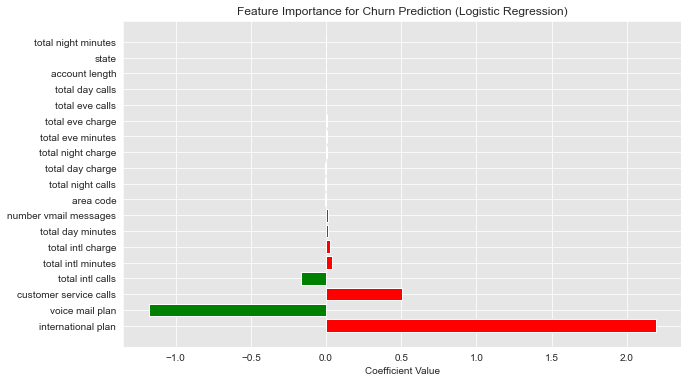

In [27]:
import matplotlib.pyplot as plt

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=['green' if x < 0 else 'red' for x in coef_df['Coefficient']])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance for Churn Prediction (Logistic Regression)')
plt.show()

The coefficients from the model tell us the direction and magnitude of each coefficient feature's influence on the probability of churn

Positive coefficients: Features with positive coefficients increases the likelihood of churn

Negative coefficients :Features with negative coefficients decreases the likelihood of churn

magnitude: The larger the absolute value of the coefficient the more significant the impact of the feature on churn.


# 2. Decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define parameter ranges
max_depth_range = [3, 5, 7, 10]  # Different depths of the tree
min_samples_split_range = [2, 5, 10]  # Minimum samples required to split a node
min_samples_leaf_range = [1, 2, 4]  # Minimum samples required at a leaf node

# Initialize variables to store the best model and best performance
best_model = None
best_score = 0
best_params = {}

# Loop through different combinations of parameters
for max_depth in max_depth_range:
    for min_samples_split in min_samples_split_range:
        for min_samples_leaf in min_samples_leaf_range:
            # Initialize the Decision Tree model with current parameters
            model = DecisionTreeClassifier(max_depth=max_depth, 
                                           min_samples_split=min_samples_split, 
                                           min_samples_leaf=min_samples_leaf, 
                                           random_state=42)
            # Fit the model to the training data
            model.fit(X_train, y_train)

            # Predict on the test set
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]

            # Evaluate performance metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            auc_roc = roc_auc_score(y_test, y_pred_proba)

            # Update the best model if current model performs better
            if auc_roc > best_score:
                best_score = auc_roc
                best_model = model
                best_params = {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1-Score': f1,
                    'AUC-ROC': auc_roc
                }

# Display the best model's parameters and performance
print("Best Decision Tree Parameters and Performance:")
print(best_params)

Best Decision Tree Parameters and Performance:
{'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 4, 'Accuracy': 0.94, 'Precision': 0.912621359223301, 'Recall': 0.6482758620689655, 'F1-Score': 0.7580645161290321, 'AUC-ROC': 0.8547408751764469}


Model interpretation


In [35]:
# Get the feature importances
feature_importances = dt_model.feature_importances_

# Print the feature importances
for feature, importance in zip(feature_names, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: state, Importance: 0.008020267160365005
Feature: account length, Importance: 0.027397316618425357
Feature: area code, Importance: 0.0
Feature: international plan, Importance: 0.0721370967854939
Feature: voice mail plan, Importance: 0.06250753538263179
Feature: number vmail messages, Importance: 0.012616555927353517
Feature: total day minutes, Importance: 0.05017196340621674
Feature: total day calls, Importance: 0.022942590005225867
Feature: total day charge, Importance: 0.2051101649277508
Feature: total eve minutes, Importance: 0.04688313972793048
Feature: total eve calls, Importance: 0.030918616951201884
Feature: total eve charge, Importance: 0.09107624595292405
Feature: total night minutes, Importance: 0.038382487495261075
Feature: total night calls, Importance: 0.014196565329488452
Feature: total night charge, Importance: 0.02296693622369
Feature: total intl minutes, Importance: 0.07092722012717292
Feature: total intl calls, Importance: 0.08409367234271338
Feature: total in

# Conclusion and Recommendation

 Model performance Summary

 Two model are evaluated logistic regression and decision tree. Here is a comparison of their performance:

 1. Logistic regression

 Accuracy: 0.8600

 Precision: 0.5397

 Recall: 0.2345

 F1-Score 0.3269

 AUC-ROC: 0.7819


 2. Decision tree

 Accuracy: 0.9400

 Precision:0.9126

 Recall: 0.6483

 F1_score: 0.7581

 AUC-ROC: 0.8547



Key Insights:

Decision tree model significantly outperforms Logistic regression in all key performance metrics, particullarly in recall and precision. It correctly identifies a high proportion of actual churn cases(recall of 64.83%) hile maintaining a high precision(91.26%). this means it accurately predicts churners without many false positives.

Logistic regression model shows lower recall(23.45%), which indicates it fails to identify most of the churn cases. While the models's AUC-ROC score is still reasonable(0.7819), its overall effectiveness in identifying churners is limited, making it less suitable for business objectives.

Implications for business

Decision tree model is highly effective for predicting customer churn. Its high precision and recall make it a reliable tool for identifying at-risk customers, allowing the company to take proactive measures to retain these customers. The models interpretability also provides insights into key factors influencing churn, which can inform targeted interventions.

Key drivers of churn:
The model reveals that factors such as contract type, tenure, customer service interactions and pricing plans are significant predictors of churn. This highlights areas where the company can focus efforts to improve customer satisfaction and reduce churn rate.

Recommendations:

Implement the Decision Tree model in a real time environment to monitor and predict churn. Use these predictions to trigger targeted retention strategies such as personalized offers, improved customer service and loyalty programs for high risk customers.

The model indicates customer dissatisfaction is a major driver of churn. Enhancing customer service and offering more flexible contract options and addressing common pain points ca significantly reduce churn rates.

Use model predictive insights to segment customers based on their churn risk. This allows the compay to allocate resources efficiently and focusing retention efforts on the most vulnerable segments.

Regularly update the model with new data to keep it accurate and reflective of changing customer behavior. Monitor model performance and refine hyperparameters as needed to ensure optimal results.

Conclusion

Decision tree model provides SyriaTel company with a powerful tool to predict and mitigate customer churn. By implementing this model and acting on its insights, the company can significantly reduce customer turnover and ultimately enhancing profitability and customer loyalty. 
